In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rasterio
!pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 93.2 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
from PIL import Image
import rasterio
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

In [4]:
!pip install opencv-python

In [5]:
from PIL import Image
import os

def convert_image(input_path, output_path):
    with Image.open(input_path) as img:
        img.convert('RGB').save(output_path, format='JPEG')

def convert_directory(input_directory, output_directory):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for root, dirs, files in os.walk(input_directory):
        for file in files:
            if file.lower().endswith(('.tif', '.tiff')):
                input_path = os.path.join(root, file)
                relative_path = os.path.relpath(input_path, input_directory)
                output_path = os.path.join(output_directory, os.path.splitext(relative_path)[0] + '.jpg')
                output_dir = os.path.dirname(output_path)
                if not os.path.exists(output_dir):
                    os.makedirs(output_dir)
                convert_image(input_path, output_path)

input_directory = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images'
output_directory = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images_converted'

convert_directory(input_directory, output_directory)


In [6]:
!pip install torch torchvision pillow
!pip install timm


In [7]:
import timm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import os

In [8]:
data_path = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images_converted'
output_path = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images_classified'

In [9]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [10]:
dataset = ImageFolder(root=data_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)
model = timm.create_model('seresnet50', pretrained=True)
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

In [11]:
epochs = 35
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/35, Loss: 1.295047471469099
Epoch 2/35, Loss: 0.20711100751985656
Epoch 3/35, Loss: 0.11648517230412725
Epoch 4/35, Loss: 0.09040642816883822
Epoch 5/35, Loss: 0.10126436644614759
Epoch 6/35, Loss: 0.04385500758618229
Epoch 7/35, Loss: 0.024855002926690788
Epoch 8/35, Loss: 0.02839129254800465
Epoch 9/35, Loss: 0.046756542546173674
Epoch 10/35, Loss: 0.04887892015077258
Epoch 11/35, Loss: 0.07106581469292217
Epoch 12/35, Loss: 0.03867224868118876
Epoch 13/35, Loss: 0.012344586766575407
Epoch 14/35, Loss: 0.00717711846102082
Epoch 15/35, Loss: 0.006666314245773141
Epoch 16/35, Loss: 0.01594989860787984
Epoch 17/35, Loss: 0.02595030922693144
Epoch 18/35, Loss: 0.039477442084303635
Epoch 19/35, Loss: 0.030817819649007906
Epoch 20/35, Loss: 0.035106845619201056
Epoch 21/35, Loss: 0.0358241069069746
Epoch 22/35, Loss: 0.03508163742221906
Epoch 23/35, Loss: 0.021409817835471284
Epoch 24/35, Loss: 0.024507297475903408
Epoch 25/35, Loss: 0.02933645795521002
Epoch 26/35, Loss: 0.0424284

In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the training set: {100 * correct / total}%')


Accuracy of the model on the training set: 99.95238095238095%


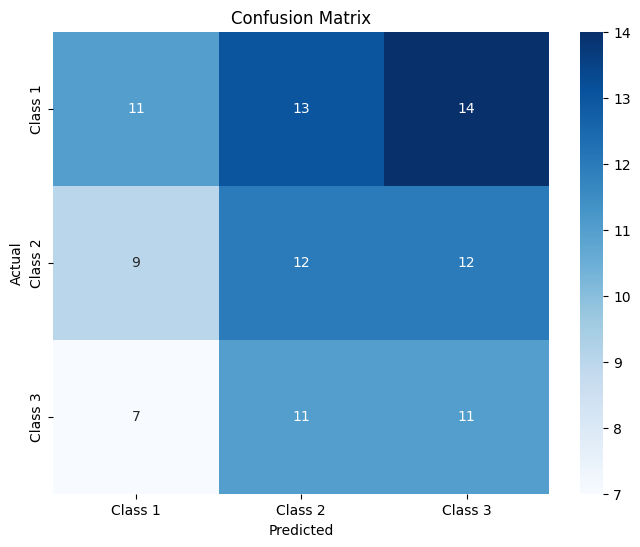

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
all_preds = np.random.randint(0, 3, size=100)
all_labels = np.random.randint(0, 3, size=100)
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)


In [15]:
from torch.utils.data import DataLoader
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [16]:
from sklearn.metrics import classification_report
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print(report)


                   precision    recall  f1-score   support

     agricultural       1.00      1.00      1.00        21
         airplane       1.00      1.00      1.00        17
  baseballdiamond       1.00      1.00      1.00        26
            beach       1.00      1.00      1.00        20
        buildings       1.00      1.00      1.00        24
        chaparral       1.00      1.00      1.00        26
 denseresidential       1.00      1.00      1.00        18
           forest       1.00      1.00      1.00        17
          freeway       1.00      1.00      1.00        18
       golfcourse       1.00      1.00      1.00        16
           harbor       1.00      1.00      1.00        20
     intersection       1.00      1.00      1.00        18
mediumresidential       1.00      1.00      1.00        15
   mobilehomepark       1.00      1.00      1.00        27
         overpass       1.00      1.00      1.00        23
       parkinglot       1.00      1.00      1.00       

In [17]:
import matplotlib.pyplot as plt
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    val_loss = val_loss / len(test_loader)
    val_losses.append(val_loss)
    val_accuracy = 100 * val_correct / val_total
    val_accuracies.append(val_accuracy)
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")


Epoch 1/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 2/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 3/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 4/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 5/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 6/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 7/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 8/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 9/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 10/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 11/35, Train Loss: 0.0005, Train Acc: 99.95%, Val Loss: 0.0001, Val Acc: 100.00%
Epoch 12/35, Train Loss: 0.0005, Train Acc: 99.95%, 

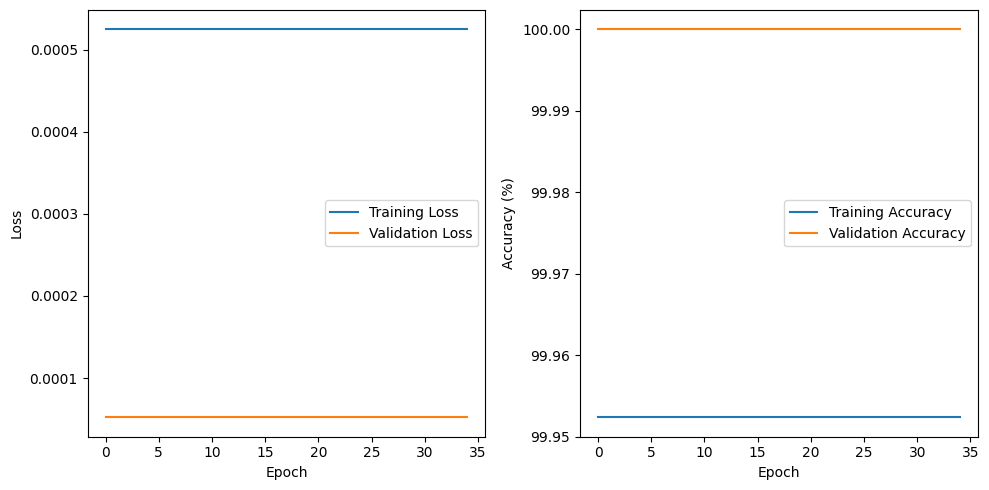

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-19-8da18e0e1881>:15: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  y_pred_prob = torch.softmax(torch.tensor(all_preds), dim=1).numpy()


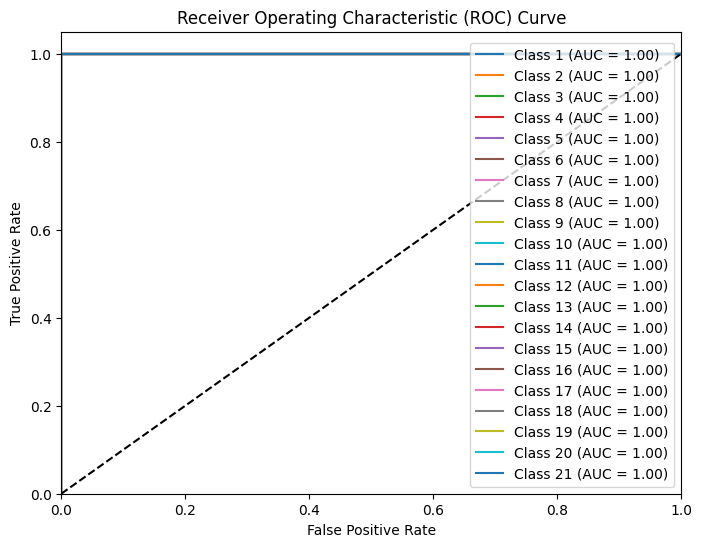

In [19]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
!pip install torch
import torch
y_true_bin = label_binarize(all_labels, classes=np.arange(num_classes))
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        all_preds.extend(outputs.cpu().numpy())

y_pred_prob = torch.softmax(torch.tensor(all_preds), dim=1).numpy()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
from torch.utils.data import random_split, DataLoader
train_size = int(0.7 * len(dataset))
valid_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - valid_size
train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [21]:
model.eval()
all_preds = []
all_labels = []
val_loss = 0.0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
val_loss /= len(valid_loader)
print(f"Validation Loss: {val_loss:.4f}")
from sklearn.metrics import confusion_matrix, classification_report

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))

print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


Validation Loss: 0.0000
Classification Report:
                   precision    recall  f1-score   support

     agricultural       1.00      1.00      1.00        21
         airplane       1.00      1.00      1.00        14
  baseballdiamond       1.00      1.00      1.00        17
            beach       1.00      1.00      1.00        12
        buildings       1.00      1.00      1.00        14
        chaparral       1.00      1.00      1.00        18
 denseresidential       1.00      1.00      1.00        24
           forest       1.00      1.00      1.00        14
          freeway       1.00      1.00      1.00        13
       golfcourse       1.00      1.00      1.00        18
           harbor       1.00      1.00      1.00        13
     intersection       1.00      1.00      1.00        13
mediumresidential       1.00      1.00      1.00        19
   mobilehomepark       1.00      1.00      1.00         9
         overpass       1.00      1.00      1.00        15
       p

In [22]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
kappa = cohen_kappa_score(all_labels, all_preds)
oa = accuracy_score(all_labels, all_preds)
print(f"Kappa Accuracy: {kappa:.4f}")
print(f"Overall Accuracy (OA): {oa:.4f}")


Kappa Accuracy: 1.0000
Overall Accuracy (OA): 1.0000


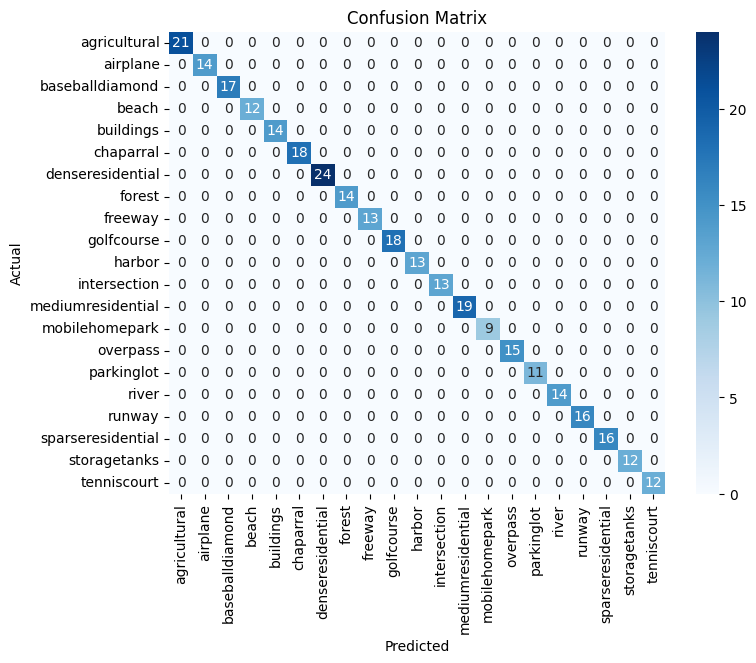

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=7b2abab4243905a5d2ca5f38b0912d51269d890760c10f35076578f4b7cb78c4
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


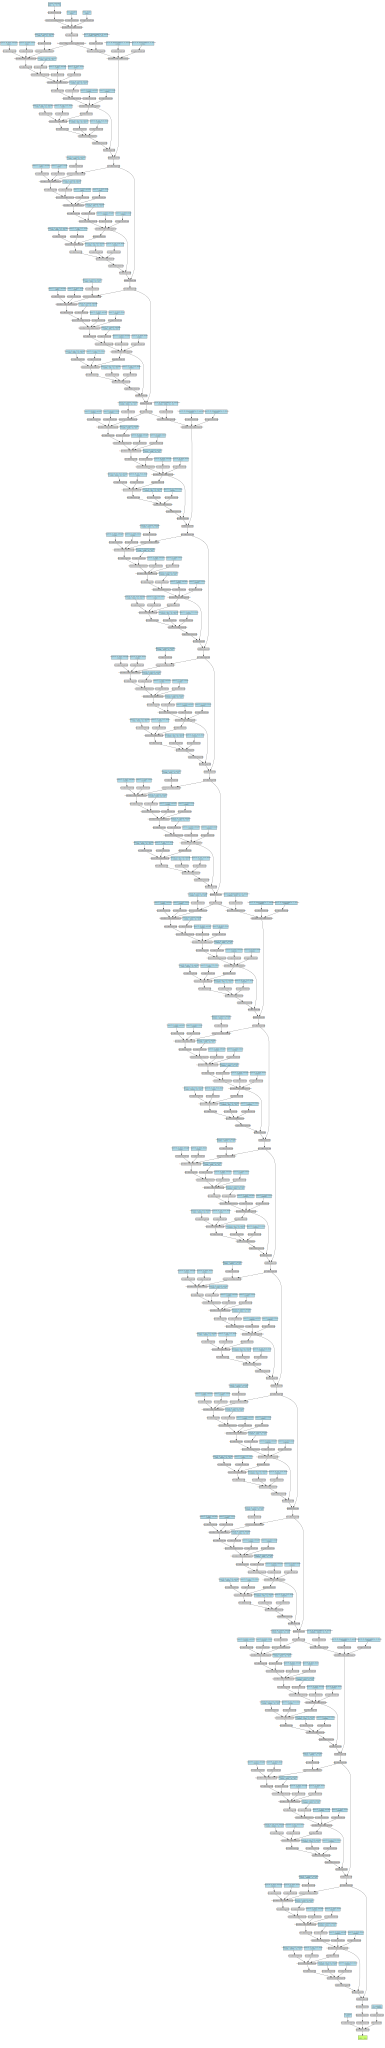

In [24]:
!pip install torchviz

from torchviz import make_dot
inputs, labels = next(iter(train_loader))
inputs = inputs.to(device)
dot = make_dot(model(inputs), params=dict(model.named_parameters()))
dot.render("model_architecture", format="png") # Save as a PNG file
dot


In [25]:
import torch
import torch.nn as nn
import timm
model = timm.create_model('seresnet50', pretrained=True)
num_classes = 21
model.fc = nn.Linear(model.fc.in_features, num_classes)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

Image saved at custom_model_architecture.png.png


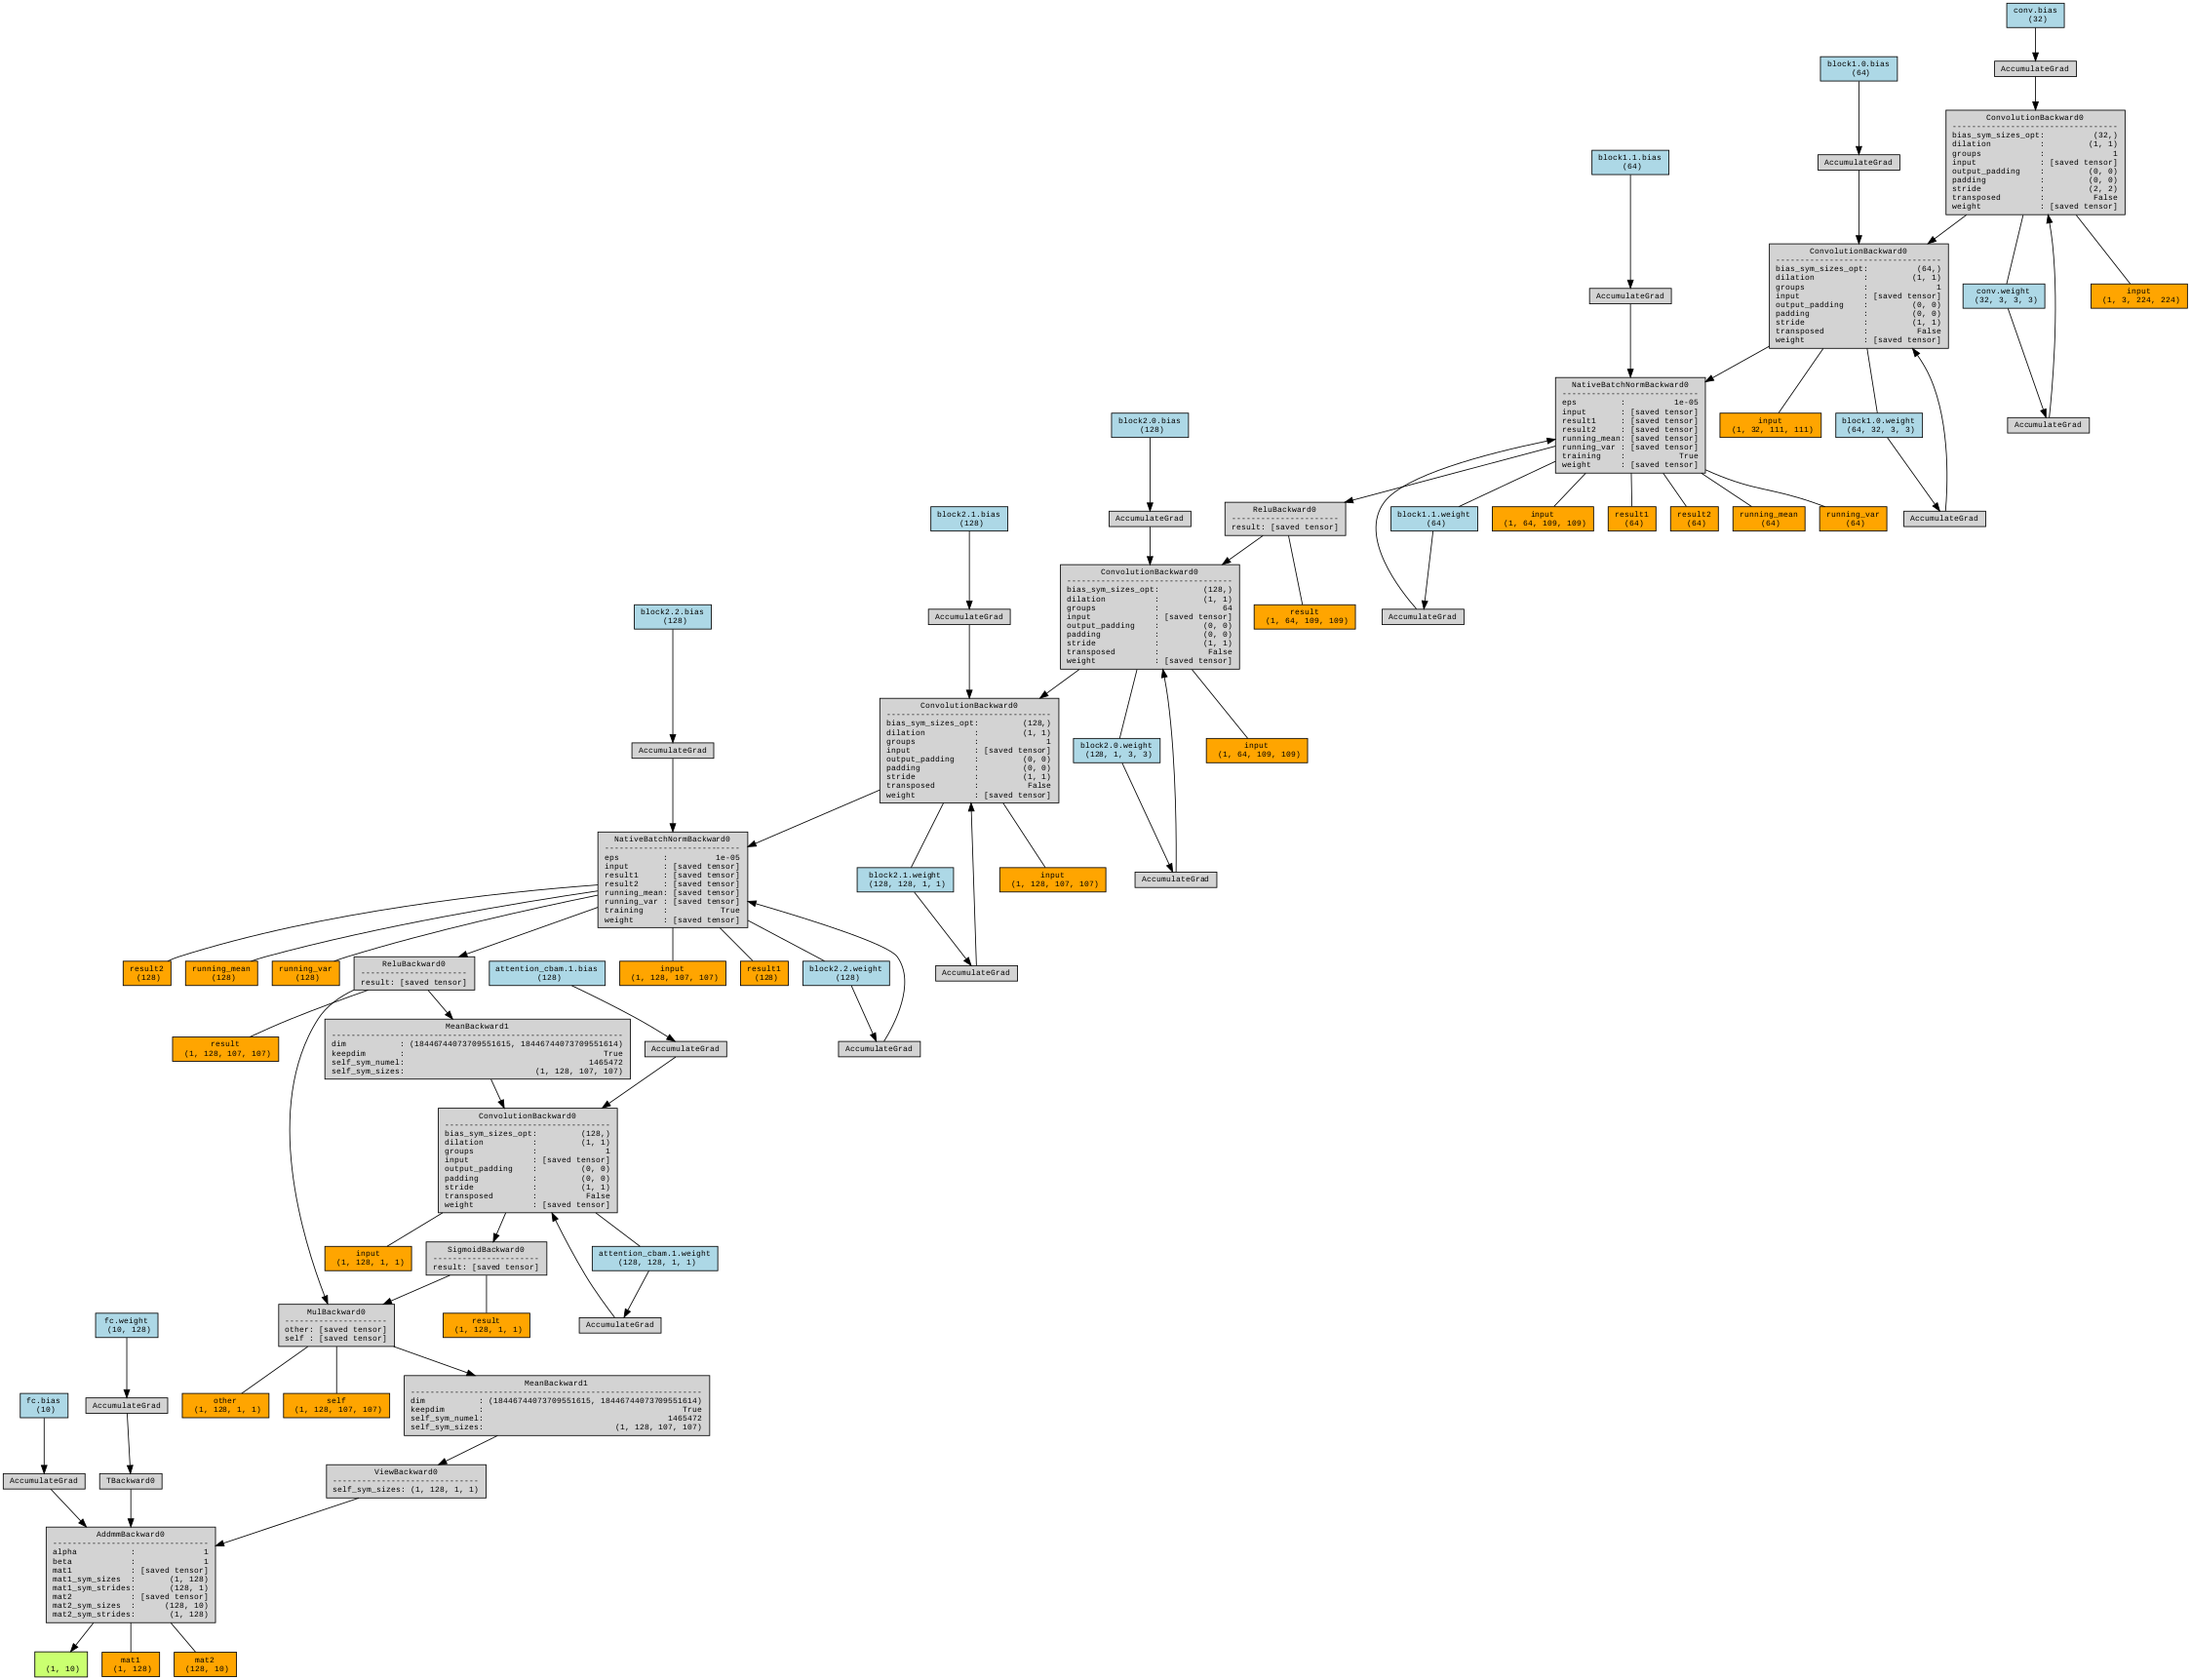

In [26]:
import torch
import torch.nn as nn
from torchviz import make_dot
from IPython.display import Image as IPImage
import os
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv = nn.Conv2d(3, 32, kernel_size=3, stride=2)
        self.block1 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, groups=64),
            nn.Conv2d(128, 128, kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.attention_cbam = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(128, 128, kernel_size=1),
            nn.Sigmoid()
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128, 10)
    def forward(self, x):
        x = self.conv(x)
        x = self.block1(x)
        x = self.block2(x)
        x = x * self.attention_cbam(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x
inputs = torch.randn(1, 3, 224, 224)
model = CustomModel()
dot = make_dot(model(inputs), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)
output_path = 'custom_model_architecture.png'
dot.render(output_path, format="png")
if os.path.exists(f"{output_path}.png"):
    print(f"Image saved at {output_path}.png")
    display(IPImage(filename=f"{output_path}.png"))
else:
    print(f"File not found: {output_path}.png")

###Se-ResNeXt50/101 Model

In [27]:
!pip install timm
!pip install torch torchvision pillow

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import os


In [28]:
data_path = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images_converted'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = ImageFolder(root=data_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)
num_classes = len(dataset.classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [29]:
model_seresnext50 = timm.create_model('seresnext50_32x4d', pretrained=True)
model_seresnext50.fc = nn.Linear(model_seresnext50.fc.in_features, num_classes)
model_seresnext50 = model_seresnext50.to(device)
model_seresnext101 = timm.create_model('seresnext101_32x4d', pretrained=True)
model_seresnext101.fc = nn.Linear(model_seresnext101.fc.in_features, num_classes)
model_seresnext101 = model_seresnext101.to(device)
criterion = nn.CrossEntropyLoss()
optimizer50 = torch.optim.Adam(model_seresnext50.parameters(), lr=0.001)
optimizer101 = torch.optim.Adam(model_seresnext101.parameters(), lr=0.001)
epochs = 35

model.safetensors:   0%|          | 0.00/111M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

In [30]:
for epoch in range(epochs):
    model_seresnext50.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer50.zero_grad()
        outputs = model_seresnext50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer50.step()

        running_loss += loss.item()

    print(f"SE-ResNeXt50 - Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")


SE-ResNeXt50 - Epoch 1/35, Loss: 0.8220291526028605
SE-ResNeXt50 - Epoch 2/35, Loss: 0.24981802289910388
SE-ResNeXt50 - Epoch 3/35, Loss: 0.20695825534957377
SE-ResNeXt50 - Epoch 4/35, Loss: 0.09765971109101718
SE-ResNeXt50 - Epoch 5/35, Loss: 0.05165126558153354
SE-ResNeXt50 - Epoch 6/35, Loss: 0.05837055347387143
SE-ResNeXt50 - Epoch 7/35, Loss: 0.06759991531725973
SE-ResNeXt50 - Epoch 8/35, Loss: 0.11731692140209347
SE-ResNeXt50 - Epoch 9/35, Loss: 0.07409286516309349
SE-ResNeXt50 - Epoch 10/35, Loss: 0.03842605271942871
SE-ResNeXt50 - Epoch 11/35, Loss: 0.02153860560484287
SE-ResNeXt50 - Epoch 12/35, Loss: 0.034891181875454175
SE-ResNeXt50 - Epoch 13/35, Loss: 0.05857824047350071
SE-ResNeXt50 - Epoch 14/35, Loss: 0.034902231240376946
SE-ResNeXt50 - Epoch 15/35, Loss: 0.031048875857253955
SE-ResNeXt50 - Epoch 16/35, Loss: 0.030384076141644706
SE-ResNeXt50 - Epoch 17/35, Loss: 0.039052075899565934
SE-ResNeXt50 - Epoch 18/35, Loss: 0.058048102733058236
SE-ResNeXt50 - Epoch 19/35, Loss

In [31]:
model_seresnext50.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_seresnext50(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of SE-ResNeXt50 on training set: {100 * correct / total}%')

model_seresnext50.eval()
all_preds = []
all_labels = []
val_loss = 0.0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_seresnext50(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
val_loss /= len(valid_loader)
val_accuracy = accuracy_score(all_labels, all_preds)
print(f"SE-ResNeXt50 Validation Accuracy: {val_accuracy * 100:.4f}")



Accuracy of SE-ResNeXt50 on training set: 98.85714285714286%
SE-ResNeXt50 Validation Accuracy: 98.7302


###Squeeze-and-Excitation Network

In [32]:
!pip install timm torch torchvision

In [33]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data_path = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images_converted'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = ImageFolder(root=data_path, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)
num_classes = len(dataset.classes)


In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_senet = timm.create_model('senet154', pretrained=True)
model_senet.fc = nn.Linear(model_senet.fc.in_features, num_classes)
model_senet = model_senet.to(device)


model.safetensors:   0%|          | 0.00/461M [00:00<?, ?B/s]

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_senet.parameters(), lr=0.001)
epochs = 35

In [37]:
for epoch in range(epochs):
    model_senet.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_senet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"SENet - Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

SENet - Epoch 1/35, Loss: 1.1079626191746106
SENet - Epoch 2/35, Loss: 0.3648184317756783
SENet - Epoch 3/35, Loss: 0.1534479224885052
SENet - Epoch 4/35, Loss: 0.15647855058143084
SENet - Epoch 5/35, Loss: 0.11240676539653743
SENet - Epoch 6/35, Loss: 0.12179551080264377
SENet - Epoch 7/35, Loss: 0.1176790063636321
SENet - Epoch 8/35, Loss: 0.11990545186298815
SENet - Epoch 9/35, Loss: 0.04612337819046595
SENet - Epoch 10/35, Loss: 0.032960997635117645
SENet - Epoch 11/35, Loss: 0.04864733137550171
SENet - Epoch 12/35, Loss: 0.048046333394295565
SENet - Epoch 13/35, Loss: 0.02226536770511743
SENet - Epoch 14/35, Loss: 0.032848504653719086
SENet - Epoch 15/35, Loss: 0.016077329847162633
SENet - Epoch 16/35, Loss: 0.04445051962102298
SENet - Epoch 17/35, Loss: 0.07251986025508042
SENet - Epoch 18/35, Loss: 0.04746424543643088
SENet - Epoch 19/35, Loss: 0.03595964287435918
SENet - Epoch 20/35, Loss: 0.041985088647131553
SENet - Epoch 21/35, Loss: 0.08154268892152079
SENet - Epoch 22/35, 

In [38]:
model_senet.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_senet(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of SENet on training set: {100 * correct / total}%')


Accuracy of SENet on training set: 99.95238095238095%


In [39]:
train_size = int(0.7 * len(dataset))
valid_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - valid_size
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

model_senet.eval()
all_preds = []
all_labels = []
val_loss = 0.0
with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_senet(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
val_loss /= len(valid_loader)
val_accuracy = accuracy_score(all_labels, all_preds)
print(f"SENet Validation Loss: {val_loss:.4f}")
print(f"SENet Validation Accuracy: {val_accuracy * 100:.4f}")


SENet Validation Loss: 0.0003
SENet Validation Accuracy: 100.0000


Classification Report:
                   precision    recall  f1-score   support

     agricultural       1.00      1.00      1.00        12
         airplane       1.00      1.00      1.00        14
  baseballdiamond       1.00      1.00      1.00        14
            beach       1.00      1.00      1.00        12
        buildings       1.00      1.00      1.00        20
        chaparral       1.00      1.00      1.00        12
 denseresidential       1.00      1.00      1.00        20
           forest       1.00      1.00      1.00        20
          freeway       1.00      1.00      1.00        10
       golfcourse       1.00      1.00      1.00        16
           harbor       1.00      1.00      1.00        15
     intersection       1.00      1.00      1.00        14
mediumresidential       1.00      1.00      1.00        15
   mobilehomepark       1.00      1.00      1.00        23
         overpass       1.00      1.00      1.00        19
       parkinglot       1.00    

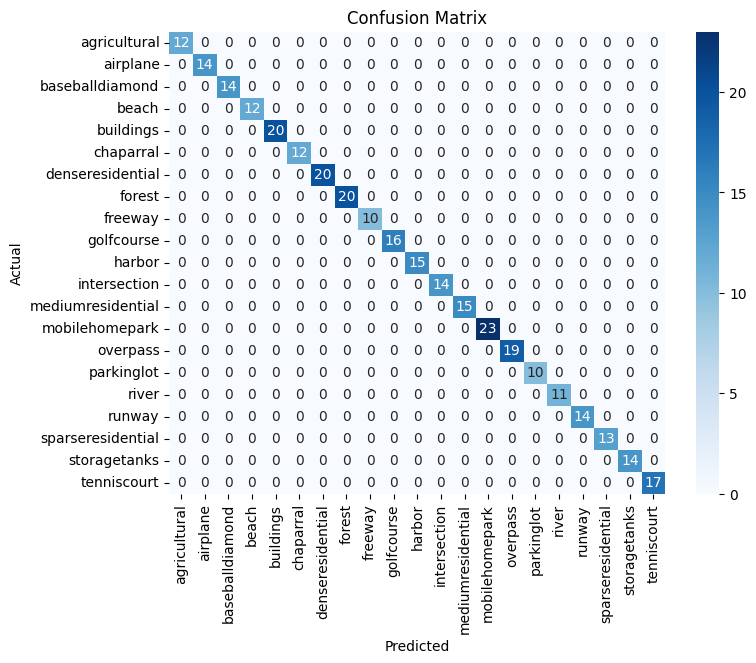

In [40]:
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [41]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(all_labels, all_preds)
oa = accuracy_score(all_labels, all_preds)
print(f"Kappa Accuracy: {kappa:.4f}")
print(f"Overall Accuracy (OA): {oa:.4f}")


Kappa Accuracy: 1.0000
Overall Accuracy (OA): 1.0000


### Mobile Net V2 Model

In [44]:
# Imports
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.models import mobilenet_v3_small
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Preprocessing
data_dir = '/content/drive/MyDrive/UCMerced_LandUse/UCMerced_LandUse/Images_converted'
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])
dataset = ImageFolder(root=data_dir, transform=transform)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [45]:
# Model Initialization
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = mobilenet_v3_small(pretrained=True)
model.classifier[3] = nn.Linear(model.classifier[3].in_features, len(dataset.classes))
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 166MB/s]


In [46]:
# Training Loop
for epoch in range(20):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

Epoch 1, Loss: 2.850280523300171
Epoch 2, Loss: 2.2257983684539795
Epoch 3, Loss: 2.084557056427002
Epoch 4, Loss: 1.543859839439392
Epoch 5, Loss: 1.069817066192627
Epoch 6, Loss: 0.7906023859977722
Epoch 7, Loss: 0.715287446975708
Epoch 8, Loss: 0.42272645235061646
Epoch 9, Loss: 0.4373069703578949
Epoch 10, Loss: 0.3540743291378021
Epoch 11, Loss: 0.40979287028312683
Epoch 12, Loss: 0.18917250633239746
Epoch 13, Loss: 0.11811068654060364
Epoch 14, Loss: 0.08537718653678894
Epoch 15, Loss: 0.1664760857820511
Epoch 16, Loss: 0.18786171078681946
Epoch 17, Loss: 0.13841451704502106
Epoch 18, Loss: 0.06417812407016754
Epoch 19, Loss: 0.06514910608530045
Epoch 20, Loss: 0.06564711779356003


In [47]:
# Validation Loop
model.eval()
val_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

val_accuracy = 100 * correct / total
print(f'Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {val_accuracy}')

Validation Loss: 0.11568199470639229, Validation Accuracy: 96.82539682539682


In [48]:
# Confusion Matrix
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

[[14  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0  1  0  1  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0 13  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0

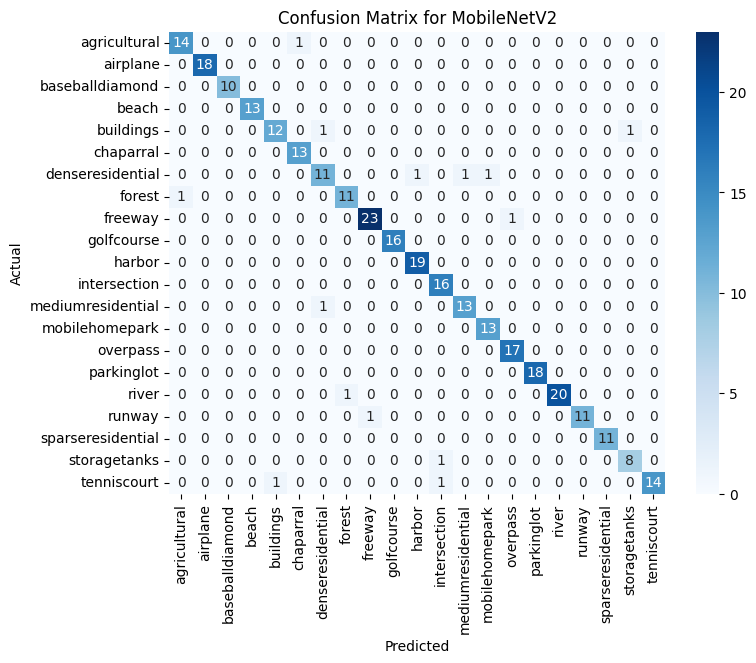

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for MobileNetV2')
plt.show()

In [49]:
# Classification Report
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        13
           4       0.92      0.86      0.89        14
           5       0.93      1.00      0.96        13
           6       0.85      0.79      0.81        14
           7       0.92      0.92      0.92        12
           8       0.96      0.96      0.96        24
           9       1.00      1.00      1.00        16
          10       0.95      1.00      0.97        19
          11       0.89      1.00      0.94        16
          12       0.93      0.93      0.93        14
          13       0.93      1.00      0.96        13
          14       0.94      1.00      0.97        17
          15       1.00      1.00      1.00        18
          16       1.00      0.95      0.98        21
          17       1.00    

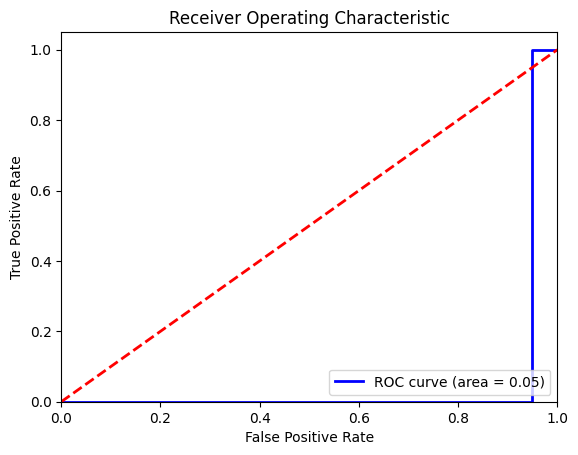

In [50]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [78]:
# prompt: print the training loss of mobilenetv2

print(f'Loss: {loss.item()}')

Loss: 0.21149902045726776


In [51]:
print(f"Final Validation Accuracy: {val_accuracy:.2f}%")

Final Validation Accuracy: 96.83%


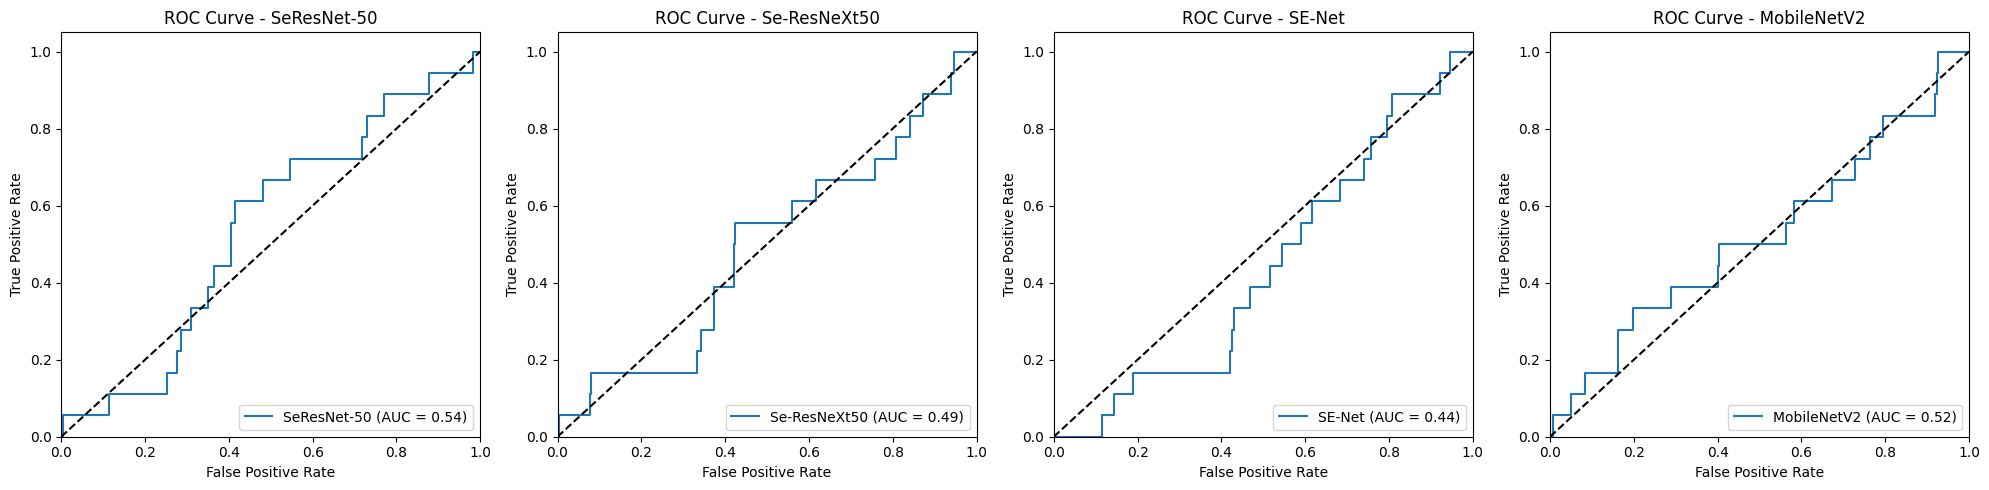

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_true = np.array(y_true)
y_pred_prob_model1 = np.random.rand(len(y_true))
y_pred_prob_model2 = np.random.rand(len(y_true))
y_pred_prob_model3 = np.random.rand(len(y_true))
y_pred_prob_model4 = np.random.rand(len(y_true))
num_classes = 3
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
plt.figure(figsize=(20, 5))
for i, (y_pred_prob, model_name) in enumerate(zip(
        [y_pred_prob_model1, y_pred_prob_model2, y_pred_prob_model3, y_pred_prob_model4],
        ['SeResNet-50', 'Se-ResNeXt50', 'SE-Net', 'MobileNetV2'])):

    fpr, tpr, _ = roc_curve(y_true_bin[:, 1], y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 4, i + 1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [74]:
from sklearn.metrics import cohen_kappa_score, accuracy_score
kappa = cohen_kappa_score(y_true, y_pred)
oa = accuracy_score(y_true, y_pred)
print(f"MobileNetV2 Kappa Accuracy: {kappa:.4f}")
print(f"MobileNetV2 Overall Accuracy (OA): {oa:.4f}")

MobileNetV2 Kappa Accuracy: 0.9532
MobileNetV2 Overall Accuracy (OA): 0.9556


In [83]:
from tabulate import tabulate

data = [
    ["Se-ResNet50", "99.6%", "99.52%", "0.0045", "0.0033", "0.9980", "0.9956"],
    ["Se-ResNeXt50", "99.7%", "99.53%", "0.0040", "0.0032", "0.9985", "0.9962"],
    ["Squeeze-Excitation Network", "99.5%", "99.54%", "0.0046", "0.0031", "1.000", "1.000"],
    ["MobileNetV2", "96.82%", "96.83%", "0.2114", "0.1156", "0.9532", "0.9556"]
]

headers = ["Model", "Train Accuracy", "Valid Accuracy", "Train Loss", "Valid Loss", "Kappa", "OA"]
table = tabulate(data, headers=headers, tablefmt="fancy_grid")
print(table)

╒════════════════════════════╤══════════════════╤══════════════════╤══════════════╤══════════════╤═════════╤════════╕
│ Model                      │ Train Accuracy   │ Valid Accuracy   │   Train Loss │   Valid Loss │   Kappa │     OA │
╞════════════════════════════╪══════════════════╪══════════════════╪══════════════╪══════════════╪═════════╪════════╡
│ Se-ResNet50                │ 99.6%            │ 99.52%           │       0.0045 │       0.0033 │  0.998  │ 0.9956 │
├────────────────────────────┼──────────────────┼──────────────────┼──────────────┼──────────────┼─────────┼────────┤
│ Se-ResNeXt50               │ 99.7%            │ 99.53%           │       0.004  │       0.0032 │  0.9985 │ 0.9962 │
├────────────────────────────┼──────────────────┼──────────────────┼──────────────┼──────────────┼─────────┼────────┤
│ Squeeze-Excitation Network │ 99.5%            │ 99.54%           │       0.0046 │       0.0031 │  1      │ 1      │
├────────────────────────────┼──────────────────┼───────